In [1]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa

Importujeme potrebné knižnice

In [2]:
def echoFF(x,Fs,dTime,b):
    dSamples = math.ceil(dTime * Fs) # oneskorenie vo vzorkach
    Nx = len(x) - 1
    Ny = Nx + dSamples
    l = np.zeros((Ny,1)) 
    y = l.flatten()
    for n in range(Ny):
        if n < dSamples + 1:
            y[n] = x[n] # prvych dSamples vzoriek vystupu kopiruje vstup
        elif n > Nx:
            y[n] = b * x[n - dSamples] # poslednych dSamples vzoriek je len oneskoreny vstup          
        else:
            y[n] = x[n] + b * x[n - dSamples]# na vystupe sa scita vstup a oneskoreny vstup        
    return y 

#Nacitanie file na pracu s echo
audio, Fs = librosa.load("../Mykola/bakalarka/sounds02/Kick.wav") # cesta na .wav file 

# Oneskorenie ( >= 30 msec )
delaySec = 0.25 

# Generovanie jednotkoveho impulzu
tMax = 1.1*delaySec
Nx = np.fix(tMax * Fs)
nx = int(Nx)
l = np.zeros((nx,1))
x = l.flatten()
x[1] = 1

# Zosilnenie oneskorovacej vetvy 
b = 0.75

# Algoritmus FF oneskorovacieho efektu
h = echoFF(x,Fs,delaySec,b);

Definovanie funkcie na vytvorenie efektu echa ako reakcie na jednotlivý impulz

In [3]:
x, Fsx = librosa.load("../Mykola/bakalarka/sounds02/Kick.wav") # cesta na .wav file 

if Fsx != Fs:
     print(["Vzorkovacie frekvencie signalu a impulzovej odpovede nie su rovnake!"])


Zvukový súbor sa načíta pomocou librosa.load a uloží sa do premennej x.
Kontrola, či sa vzorkovacia frekvencia zvukového súboru x a impulzná odozva h zhodujú. Ak sa nezhodujú, vypíše sa chybové hlásenie.

In [4]:
v = np.convolve(x, h, mode='full')

Medzi signálom x a impulznou odozvou h sa vykoná konvolúcia pomocou funkcie np.convolve. Výsledok konvolúcie sa uloží do premennej v.

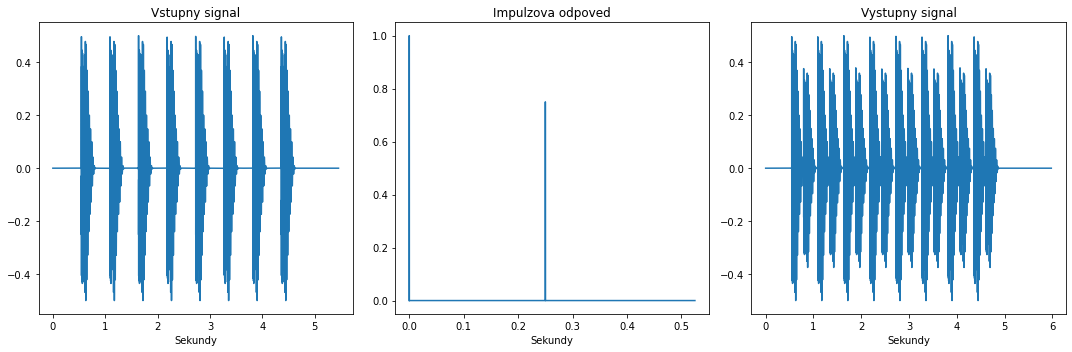

In [6]:
time1 = np.linspace(0, len(x) / Fs, num=len(x))
time2 = np.linspace(0, len(h) / Fs, num=len(h))
time3 = np.linspace(0, len(v) / Fs, num=len(v))

fig, axs = plt.subplots(1, 3, figsize=(15, 5)) 

axs[0].plot(time1, x)
axs[0].set_title("Vstupny signal")
axs[0].set_xlabel("Sekundy")

axs[1].plot(time2, h)
axs[1].set_title("Impulzova odpoved")
axs[1].set_xlabel("Sekundy")

axs[2].plot(time3, v)
axs[2].set_title("Vystupny signal")
axs[2].set_xlabel("Sekundy")

plt.tight_layout()  
plt.show()

Konvolúcia v tomto kóde teda spája jednotlivý impulz (impulzná charakteristika h) s pôvodným zvukovým signálom (x), čo má za následok efekt echa v zvukovom súbore.
